In [37]:
mutable struct Pendulum
    mass::Number
    len::Number
    θ::Number
    θ_dot::Number
end

In [38]:
dt = 0.1

0.1

In [65]:
function iterate(x::Float64, y::Float64, pen::Pendulum)

    pen.θ_dot += -dt * pen.θ
    pen.θ += pen.θ_dot * dt
    
    return pen.len * sin(pen.θ), -pen.len * cos(pen.θ)
end

iterate (generic function with 1 method)

In [66]:
using Random
using Plots

pen = Pendulum(1, 1, 1, 0)

x = [0, pen.len * sin(pen.θ)]
y = [0, -cos(pen.θ)]

anim = @animate for i in 1:50
    # Random.seed!(123)

    x[2], y[2] = iterate(x[2], y[2], pen)
    
    plot(x, y, xlims=(-1,1),ylims=(-1.2,0.2); marker=(:circle,2))
    # scatter(x, y)
end

Animation("/var/folders/z0/_9x091jj0vs_797b_p_b7vcc0000gq/T/jl_U6L9Wa", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

[ Info: Saved animation to /Users/05jaco01/Code/Physics/Pendulums/tmp.gif


Plots.AnimatedGif("/Users/05jaco01/Code/Physics/Pendulums/tmp.gif")
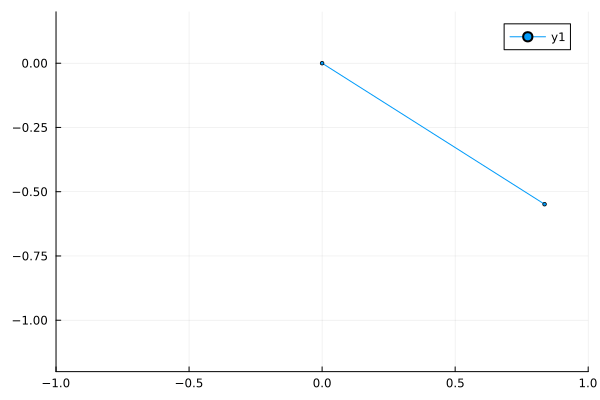

In [67]:
gif(anim, fps=5)